In [4]:
import numpy as np

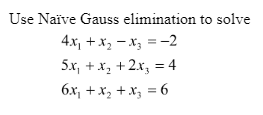

In [5]:
def naive_gauss_elimination_with_partial_pivoting(A, b):
    # Convert inputs to numpy arrays for convenience
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)

    n = len(b)

    # Forward elimination
    for i in range(n):
        # Partial pivoting: Find the row with the largest pivot and swap
        max_row = i + np.argmax(abs(A[i:, i]))
        if A[max_row, i] == 0:
            raise ValueError("Matrix is singular or nearly singular.")

        # Swap rows in A and b
        if max_row != i:
            A[[i, max_row]] = A[[max_row, i]]
            b[[i, max_row]] = b[[max_row, i]]

        # Eliminate entries below the pivot
        for j in range(i + 1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]

    # Back substitution
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]

    return x

In [7]:
A = [
    [4, 1, -1],
    [5, 1, 2],
    [6, 1, 1]
]
b = [-2, 4, 6]

solution = naive_gauss_elimination_with_partial_pivoting(A, b)
print("Solution:", solution)

Solution: [  3. -13.   1.]


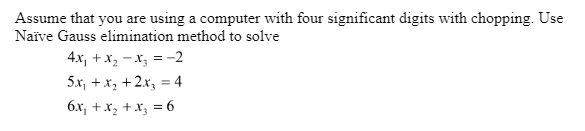

In [11]:
def naive_gauss_elimination_with_partial_pivoting_four_siginificant(A, b):
    # Helper function to chop to four significant digits
    def chop(value):
        if value == 0:
            return 0.0
        return float(f"{value:.4g}")

    # Convert inputs to numpy arrays for convenience
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)

    n = len(b)

    # Forward elimination
    for i in range(n):
        # Partial pivoting: Find the row with the largest pivot and swap
        max_row = i + np.argmax(abs(A[i:, i]))
        if A[max_row, i] == 0:
            raise ValueError("Matrix is singular or nearly singular.")

        # Swap rows in A and b
        if max_row != i:
            A[[i, max_row]] = A[[max_row, i]]
            b[[i, max_row]] = b[[max_row, i]]

        # Eliminate entries below the pivot
        for j in range(i + 1, n):
            factor = chop(A[j, i] / A[i, i])
            A[j, i:] = np.array([chop(v - factor * p) for v, p in zip(A[j, i:], A[i, i:])])
            b[j] = chop(b[j] - factor * b[i])

    # Back substitution
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = chop((b[i] - chop(np.dot(A[i, i + 1:], x[i + 1:]))) / A[i, i])

    return x


In [12]:
A = [
    [4, 1, -1],
    [5, 1, 2],
    [6, 1, 1]
]
b = [-2, 4, 6]

solution = naive_gauss_elimination_with_partial_pivoting_four_siginificant(A, b)
print("Solution:", solution)

Solution: [  3. -13.   1.]


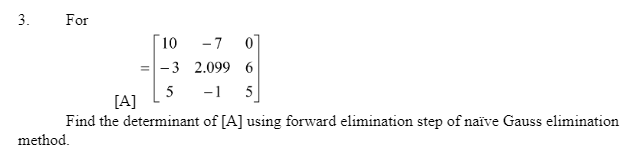

In [22]:
def determinant_via_forward_elimination(A):
    # Convert input to numpy array for convenience
    A = np.array(A, dtype=float)
    n = len(A)
    det = 1.0

    # Forward elimination
    for i in range(n):
        # Partial pivoting: Find the row with the largest pivot and swap
        max_row = i + np.argmax(abs(A[i:, i]))
        if A[max_row, i] == 0:
            return 0.0  # Determinant is zero for singular matrix

        # Swap rows if needed
        if max_row != i:
            A[[i, max_row]] = A[[max_row, i]]
            det *= -1  # Row swap changes the sign of the determinant

        # Multiply by pivot element
        det *= A[i, i]

        # Eliminate entries below the pivot
        for j in range(i + 1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]

    return det

In [23]:
A = [
    [10, -7, 0],
    [-3, 2.099, 6],
    [5, -1, 5]
]

det = determinant_via_forward_elimination(A)
print("Determinant:", det)

Determinant: -150.04999999999998


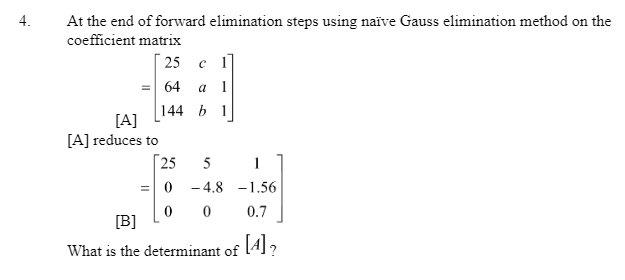

In [25]:
def gaussian_elimination_with_determinant(matrix):
    # Convert matrix to float for precision in operations
    matrix = matrix.astype(float)
    n = len(matrix)
    determinant = 1  # Initialize determinant

    # Gaussian Elimination Process
    for i in range(n):
        # Pivoting: Find the maximum element in the current column
        max_row = i + np.argmax(abs(matrix[i:, i]))
        if i != max_row:
            # Swap rows
            matrix[[i, max_row]] = matrix[[max_row, i]]
            determinant *= -1  # Row swaps invert the determinant

        # Eliminate rows below the pivot
        for j in range(i + 1, n):
            if matrix[i, i] == 0:
                return 0  # Determinant is 0 if a pivot is zero

            scaling_factor = matrix[j, i] / matrix[i, i]
            matrix[j, i:] -= scaling_factor * matrix[i, i:]

        # Track determinant by multiplying diagonal elements
        determinant *= matrix[i, i]

    return determinant, matrix

# Example matrix (from the problem statement)
A = np.array([
    [25, 5, 1],
    [64, -4.8, 1],
    [144, 0, 0.7]
])

# Compute determinant and reduced matrix
determinant, reduced_matrix = gaussian_elimination_with_determinant(A)

print("Reduced Matrix after Gaussian Elimination:")
print(reduced_matrix)
print(f"Determinant of A: {determinant:.4f}")


Reduced Matrix after Gaussian Elimination:
[[144.           0.           0.7       ]
 [  0.           5.           0.87847222]
 [  0.           0.           1.53222222]]
Determinant of A: 1103.2000


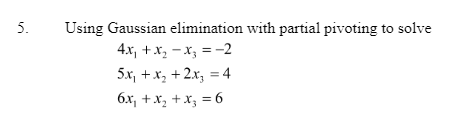

In [29]:
def gaussian_elimination_with_partial_pivoting(A, b):
    n = len(b)
    # Augment the matrix A with b
    Ab = np.hstack([A, b.reshape(-1, 1)])

    # Forward elimination
    for i in range(n):
        # Partial pivoting: Find the maximum element in the current column
        max_row = np.argmax(np.abs(Ab[i:, i])) + i

        # Swap rows if necessary
        if max_row != i:
            Ab[[i, max_row]] = Ab[[max_row, i]]

        # Make the pivot element 1 (normalization)
        Ab[i] = Ab[i] / Ab[i, i]

        # Eliminate entries below the pivot
        for j in range(i + 1, n):
            Ab[j] = Ab[j] - Ab[j, i] * Ab[i]

    # Back substitution
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = Ab[i, -1] - np.dot(Ab[i, i + 1:n], x[i + 1:n])

    return x

In [42]:
A = np.array([[4, 1, -1],[5, 1, 2],[6, 1, 1]], dtype=float)

B = np.array(
    [-2, 4, 6]
, dtype=float)

d = gaussian_elimination_with_partial_pivoting(A, B)
print("Solution:", d)

Solution: [  3. -13.   1.]


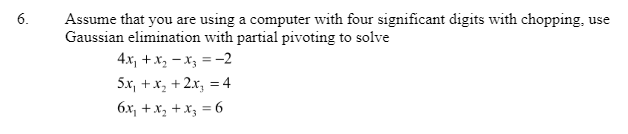

In [43]:
def gaussian_elimination_with_partial_pivoting(A, b):
    def chop(value, sig_digits=4):
        """Chop a value to four significant digits."""
        if value == 0:
            return 0
        return float(f"{value:.{sig_digits}g}")

    n = len(b)
    # Augment the matrix A with b
    Ab = np.hstack([A, b.reshape(-1, 1)])

    # Forward elimination
    for i in range(n):
        # Partial pivoting: Find the maximum element in the current column
        max_row = np.argmax(np.abs(Ab[i:, i])) + i

        # Swap rows if necessary
        if max_row != i:
            Ab[[i, max_row]] = Ab[[max_row, i]]

        # Make the pivot element 1 (normalization)
        Ab[i] = np.array([chop(val) for val in (Ab[i] / Ab[i, i])])

        # Eliminate entries below the pivot
        for j in range(i + 1, n):
            factor = chop(Ab[j, i])
            Ab[j] = np.array([chop(val) for val in (Ab[j] - factor * Ab[i])])

    # Back substitution
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = chop(Ab[i, -1] - np.dot(Ab[i, i + 1:n], x[i + 1:n]))

    return x

In [46]:
A = np.array([[4, 1, -1],
              [5, 1, 2],
              [6, 1, 1]], dtype=float)

B = np.array([-2, 4, 6], dtype=float)

solution = gaussian_elimination_with_partial_pivoting(A, B)
print("Solution:", solution)

Solution: [  3.002  -13.01     0.9995]
